# **Лабораторная №3. Регрессия**



## **1. Линейная регрессия**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1. Считывание данных**

In [ ]:
lin3_df = pd.read_csv('lab3_lin3.csv')
lin3_df.head()

,x1,x2,x3,x5,y
0,-0.9037,-1.0798,-3.1031,-0.3140,-23.4544
1,-0.3493,-0.0351,-0.7074,-0.3945,-8.0183
2,-0.6300,0.3800,-0.7846,0.7628,-8.7186
3,-1.1512,-0.2577,-0.5640,1.3832,-4.2153
4,-1.0127,-0.1675,1.6817,-0.1974,15.3587


### **1.2. Предобработка**

####  **1.2.1. Нормировка данных**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_s = MinMaxScaler()
min_max_s.set_output(transform='pandas')
lin3_df_norm = min_max_s.fit_transform(lin3_df)
X = lin3_df_norm.drop('y', axis=1)
y = lin3_df_norm[['y']]

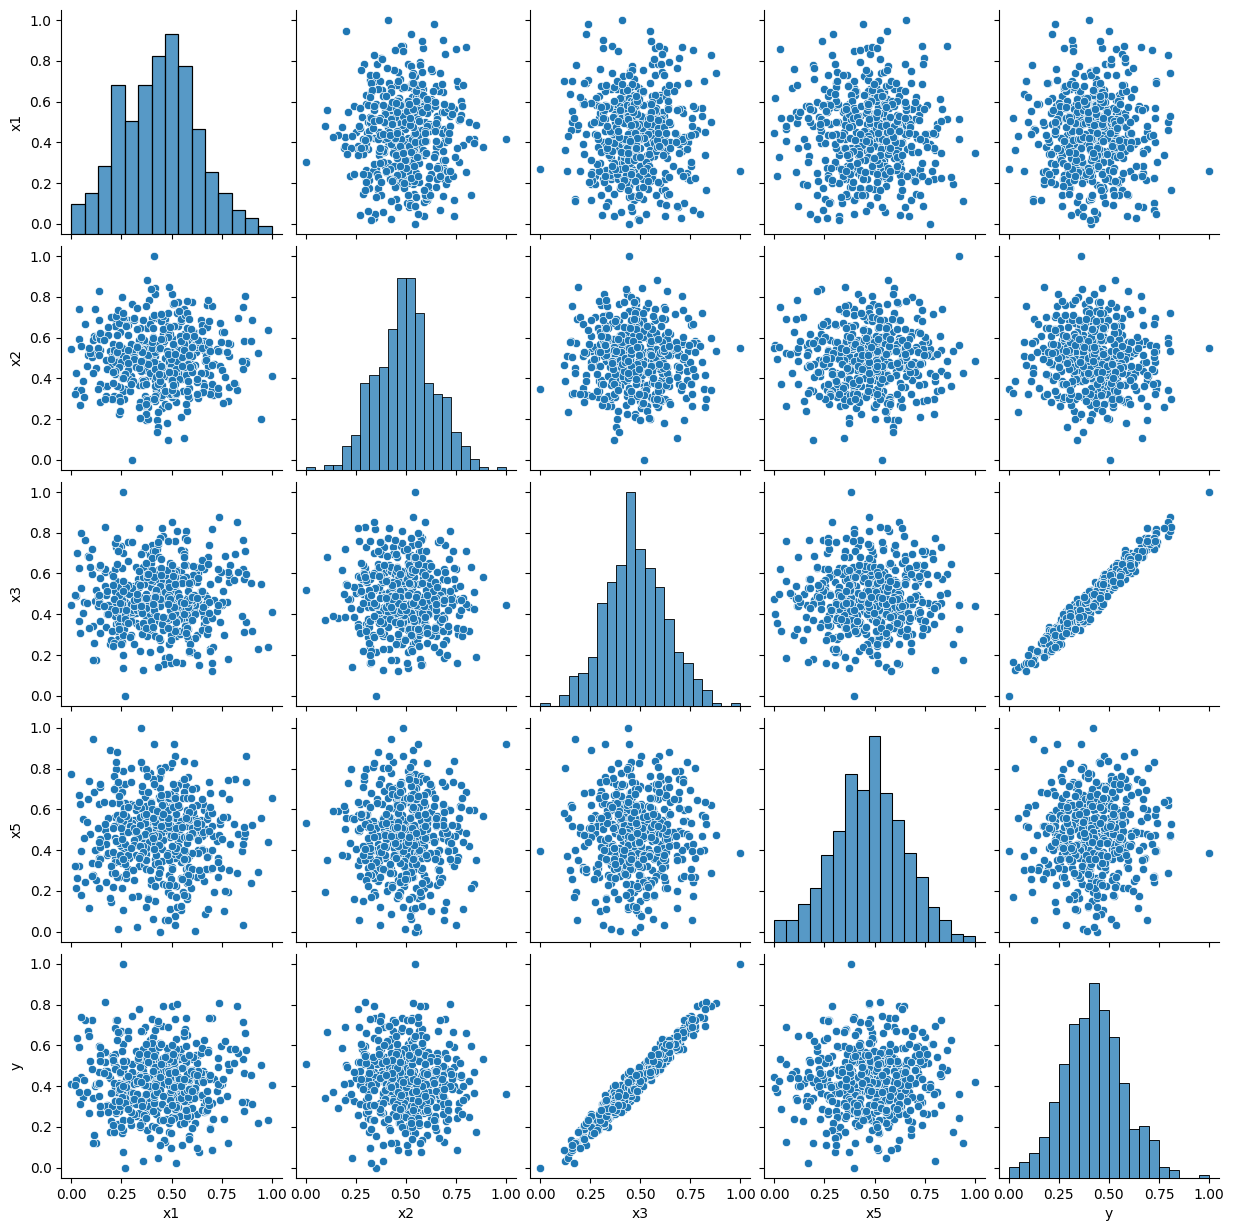

In [ ]:
sns.pairplot(lin3_df_norm)

####  **1.2.2. Разбиение на тестовую и обучающую выборки**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

<Axes: xlabel='x5', ylabel='Proportion'>

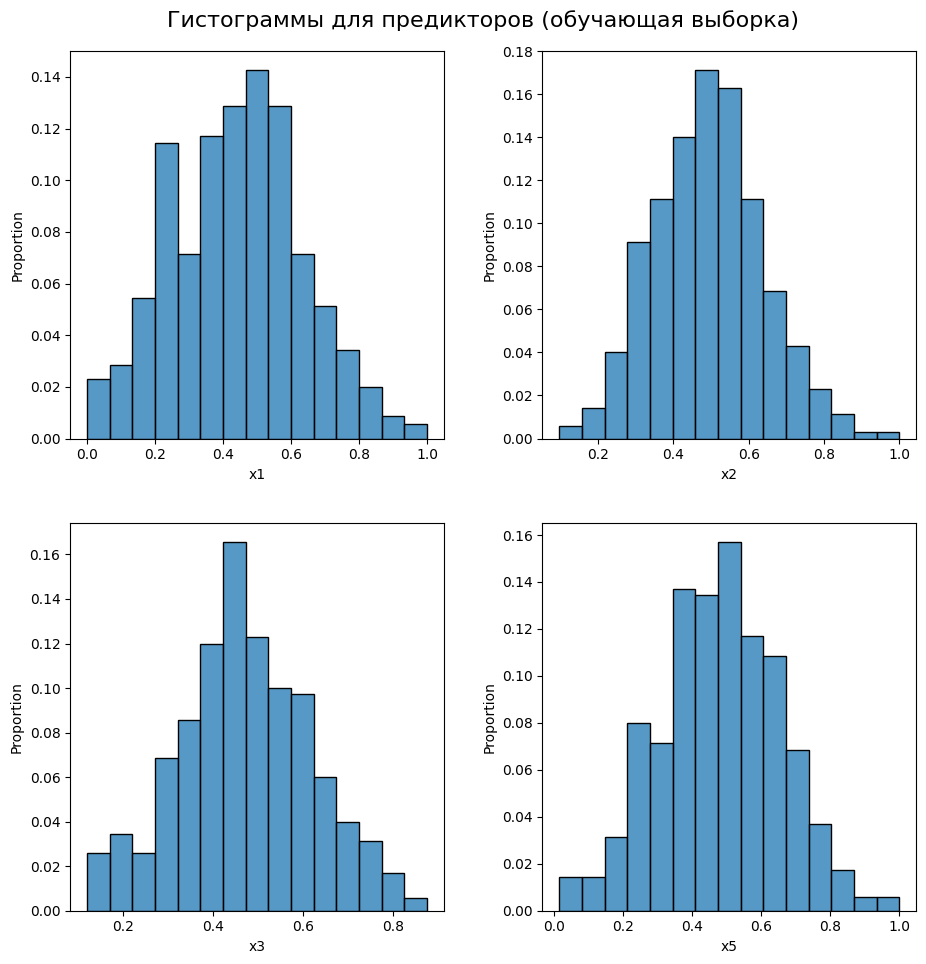

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=4)
fig.suptitle('Гистограммы для предикторов (обучающая выборка)', size=16)
sns.histplot(X_train['x1'], ax=axs[0][0], stat='proportion', bins=15)
sns.histplot(X_train['x2'], ax=axs[0][1], stat='proportion', bins=15)
sns.histplot(X_train['x3'], ax=axs[1][0], stat='proportion', bins=15)
sns.histplot(X_train['x5'], ax=axs[1][1], stat='proportion', bins=15)

<Axes: xlabel='x5', ylabel='Proportion'>

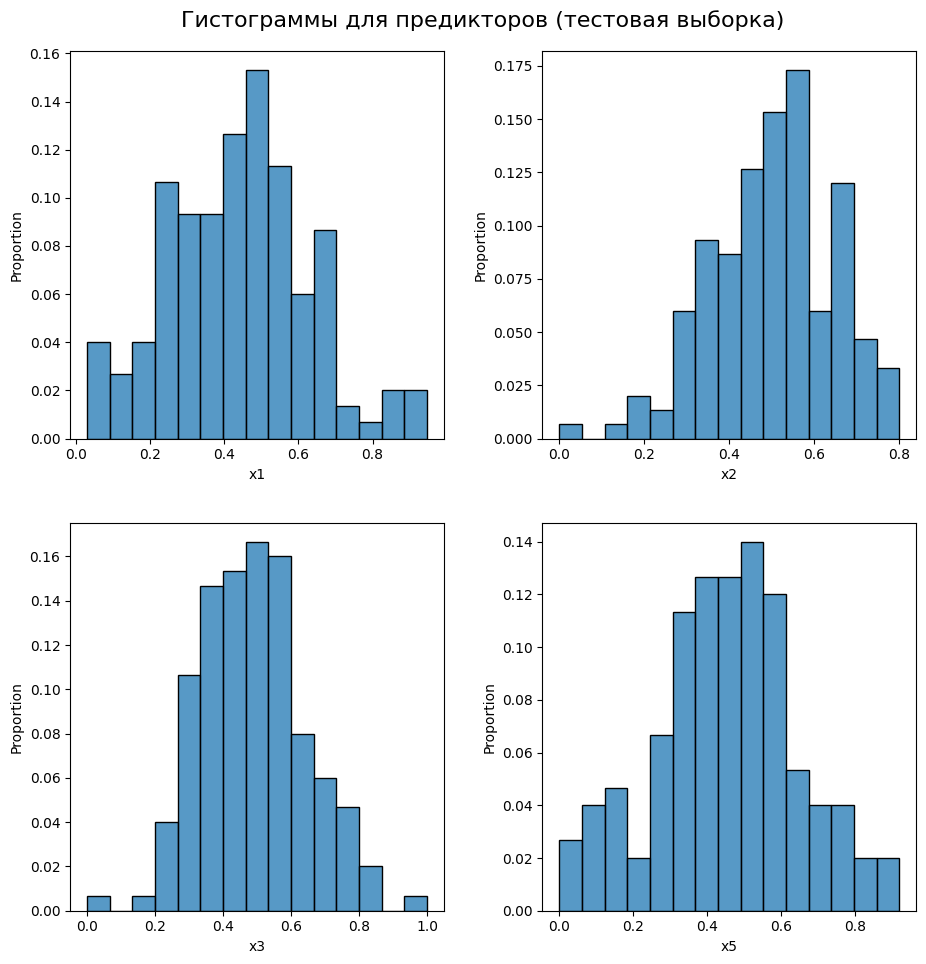

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=4)
fig.suptitle('Гистограммы для предикторов (тестовая выборка)', size=16)
sns.histplot(X_test['x1'], ax=axs[0][0], stat='proportion', bins=15)
sns.histplot(X_test['x2'], ax=axs[0][1], stat='proportion', bins=15)
sns.histplot(X_test['x3'], ax=axs[1][0], stat='proportion', bins=15)
sns.histplot(X_test['x5'], ax=axs[1][1], stat='proportion', bins=15)

<Axes: title={'center': 'Тестовая выборка'}, xlabel='y', ylabel='Proportion'>

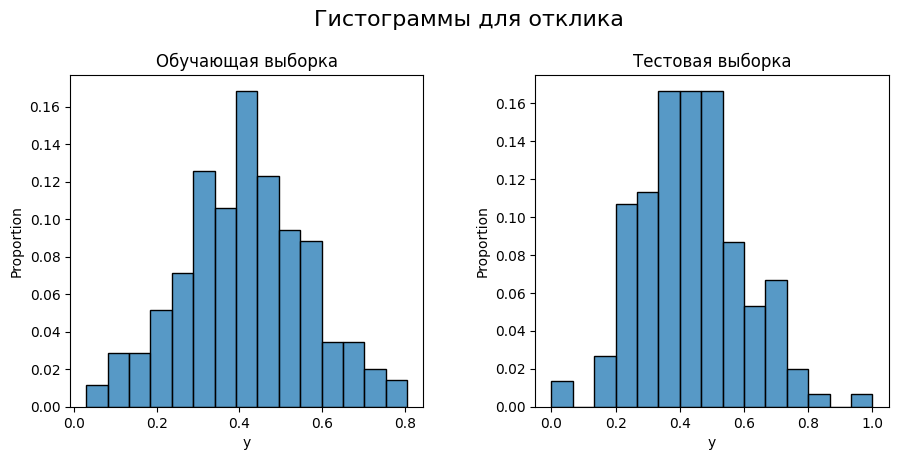

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
fig.tight_layout(pad=5)
fig.suptitle("Гистограммы для отклика", size=16)
axs[0].set_title('Обучающая выборка')
axs[1].set_title('Тестовая выборка')
sns.histplot(y_train['y'], stat='proportion', bins=15, ax=axs[0])
sns.histplot(y_test['y'], stat='proportion', bins=15, ax=axs[1])

###  **1.3. Регрессия с помощью LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)
y_train_pred = lin_regr.predict(X_train)
y_test_pred = lin_regr.predict(X_test)

print(lin_regr.coef_)
print(lin_regr.intercept_)

[[ 4.57154758e-03 -9.03199152e-04  9.88566824e-01  1.68311388e-03]]
[-0.05416924]


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
lin_r2_train = r2_score(y_train, y_train_pred)
lin_r2_test = r2_score(y_test, y_test_pred)
lin_mae_train = mean_absolute_error(y_train, y_train_pred)
lin_mae_test = mean_absolute_error(y_test, y_test_pred)
lin_mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
lin_mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(lin_r2_train)
print(lin_r2_test)
print(lin_mae_train)
print(lin_mae_test)
print(lin_mape_train)
print(lin_mape_test)

0.9519579932739369
0.9456520963847401
0.026810380961667286
0.03070148396996706
0.08254087474147537
1578720582683.6172


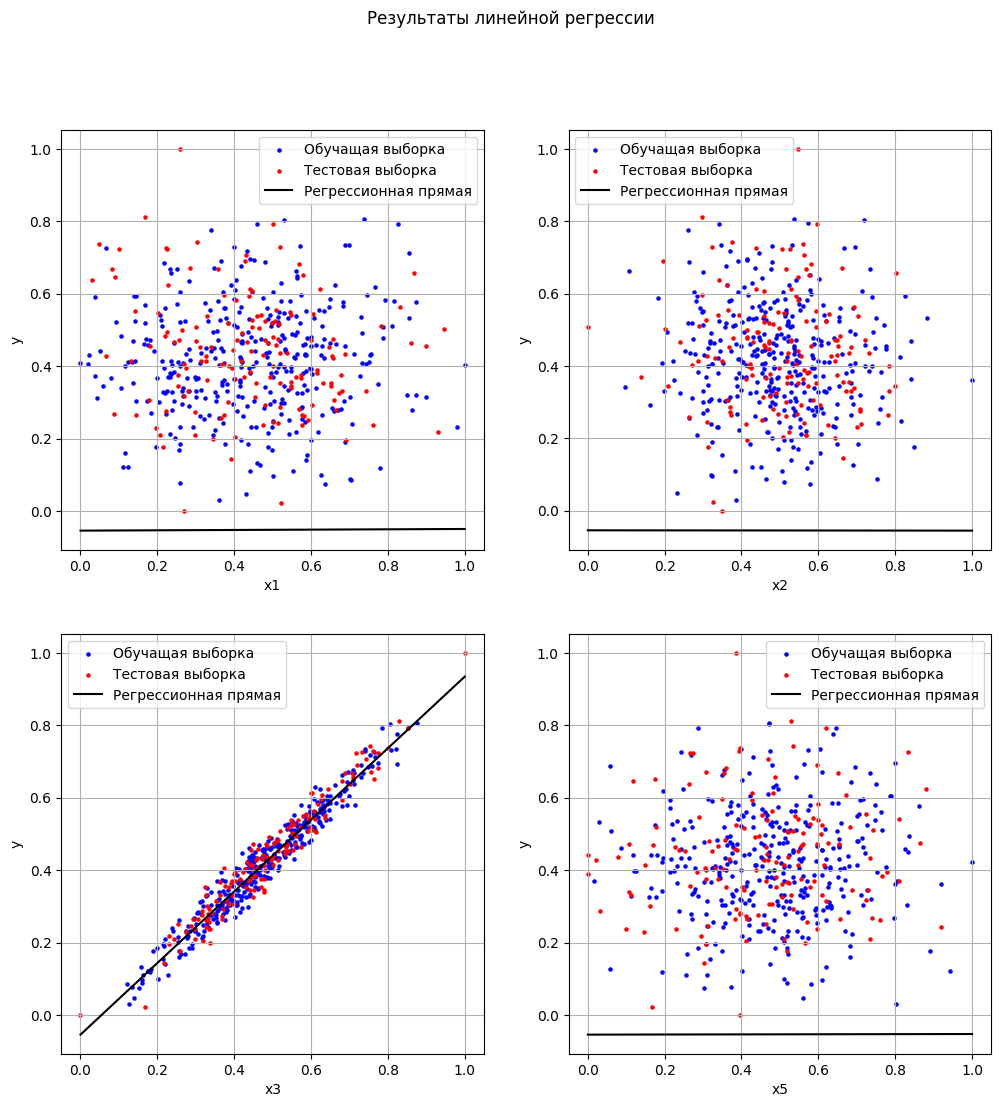

In [ ]:
# Регрессионная прямая
x_line = np.linspace(0, 1, 4)
y_lines = lin_regr.coef_.reshape(-1, 1) * x_line  + lin_regr.intercept_



fig, axs = plt.subplots(2, 2, figsize=(12, 12))
predictors = list(X)
for i in range(2):
  for j in range(2):
    ax = axs[i][j]
    predictor = predictors[2 * i + j]
    ax.set_xlabel(predictor)
    ax.set_ylabel('y')
    ax.scatter(X_train[predictor], y_train, c = 'b', s=5, label='Обучащая выборка')
    ax.scatter(X_test[predictor], y_test, c = 'r', s=5, label='Тестовая выборка')
    ax.plot(x_line, y_lines[2 * i + j], c='black', label='Регрессионная прямая')
    ax.grid()
    ax.legend()

fig.suptitle('Результаты линейной регрессии')
fig.show()

### **1.4. Модификации линейной регрессии**

#### **1.4.1. Lasso-регрессия**

In [ ]:
from sklearn.linear_model import Lasso
lasso_regr = Lasso(0.0001)

lasso_regr.fit(X_train, y_train)
y_train_pred = lasso_regr.predict(X_train)
y_test_pred = lasso_regr.predict(X_test)

print(lasso_regr.coef_)
print(lasso_regr.intercept_)

[ 0.00198084 -0.          0.98427644  0.        ]
[-0.05063845]


In [ ]:
lasso_r2_train = r2_score(y_train, y_train_pred)
lasso_r2_test = r2_score(y_test, y_test_pred)
lasso_mae_train = mean_absolute_error(y_train, y_train_pred)
lasso_mae_test = mean_absolute_error(y_test, y_test_pred)
lasso_mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
lasso_mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(lasso_r2_train)
print(lasso_r2_test)
print(lasso_mae_train)
print(lasso_mae_test)
print(lasso_mape_train)
print(lasso_mape_test)

0.9519232392462421
0.9456082100801749
0.02686004387499019
0.030742937938611027
0.08312395866450559
1504303276944.0046


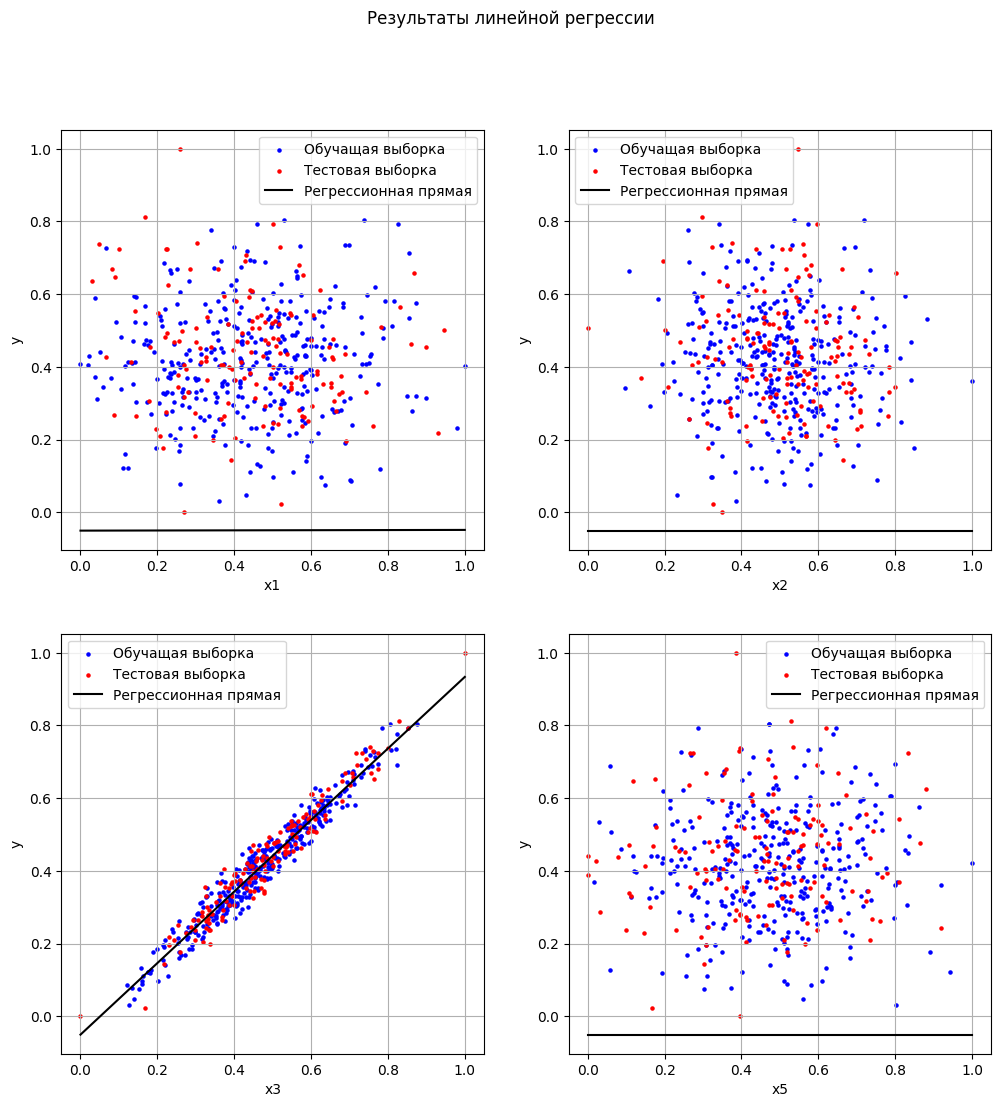

In [ ]:
x_line = np.linspace(0, 1, 4)
y_lines = lasso_regr.coef_.reshape(-1, 1) * x_line  + lasso_regr.intercept_



fig, axs = plt.subplots(2, 2, figsize=(12, 12))
predictors = list(X)
for i in range(2):
  for j in range(2):
    ax = axs[i][j]
    predictor = predictors[2 * i + j]
    ax.set_xlabel(predictor)
    ax.set_ylabel('y')
    ax.scatter(X_train[predictor], y_train, c = 'b', s=5, label='Обучащая выборка')
    ax.scatter(X_test[predictor], y_test, c = 'r', s=5, label='Тестовая выборка')
    ax.plot(x_line, y_lines[2 * i + j], c='black', label='Регрессионная прямая')
    ax.grid()
    ax.legend()

fig.suptitle('Результаты линейной регрессии')
fig.show()

#### **1.4.2. Гребневая регрессия**

In [ ]:
from sklearn.linear_model import Ridge
ridge_regr = Ridge(3)

ridge_regr.fit(X_train, y_train)

y_train_pred = ridge_regr.predict(X_train)
y_test_pred = ridge_regr.predict(X_test)

print(ridge_regr.coef_, ridge_regr.intercept_)

[[ 0.01178726 -0.0117886   0.71156658  0.00463232]] [0.07749265]


In [ ]:
ridge_r2_train = r2_score(y_train, y_train_pred)
ridge_r2_test = r2_score(y_test, y_test_pred)
ridge_mae_train = mean_absolute_error(y_train, y_train_pred)
ridge_mae_test = mean_absolute_error(y_test, y_test_pred)
ridge_mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
ridge_mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(ridge_r2_train)
print(ridge_r2_test)
print(ridge_mae_train)
print(ridge_mae_test)
print(ridge_mape_train)
print(ridge_mape_test)

0.8776464137303988
0.8602064551811702
0.042513347684010716
0.04646267686356054
0.1593023980099563
2353774380941.987


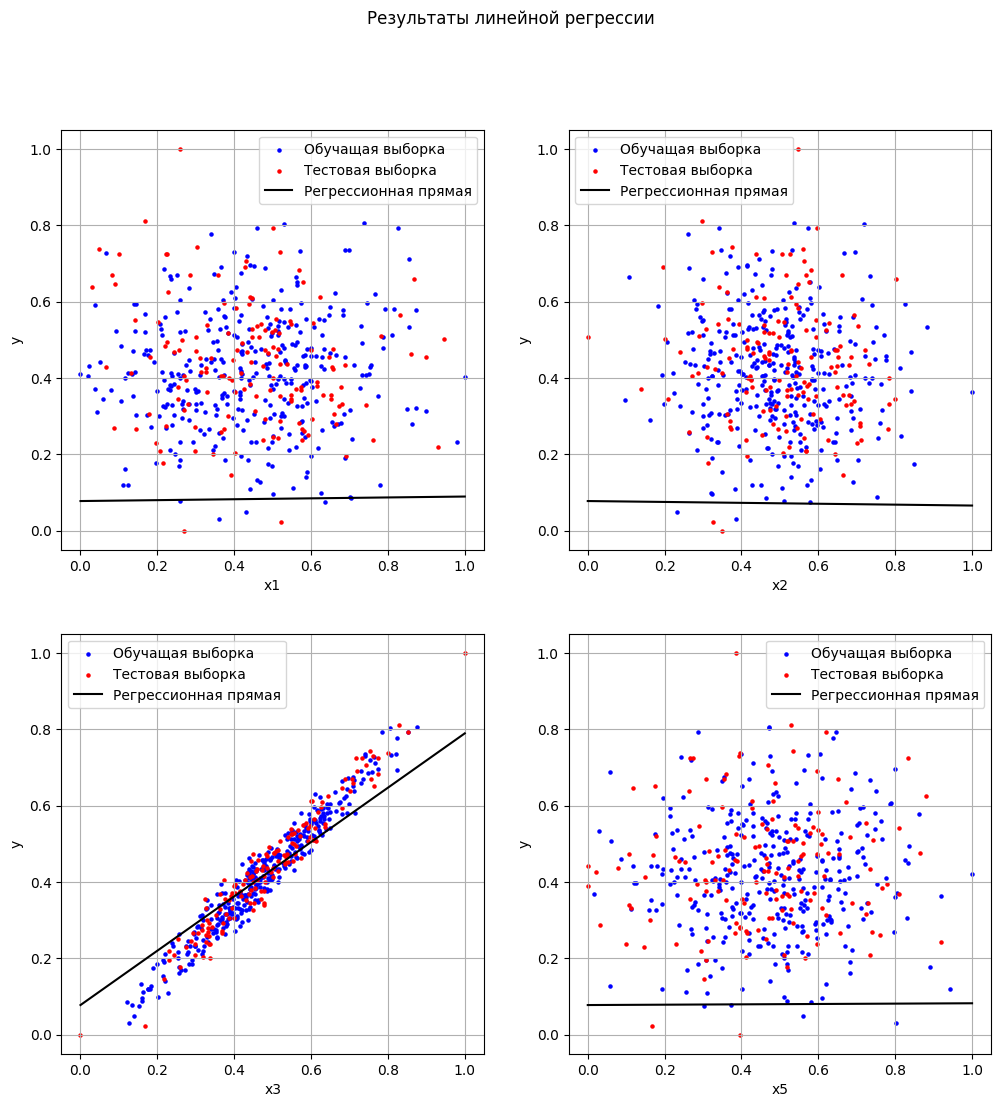

In [ ]:
# Регрессионная прямая
x_line = np.linspace(0, 1, 4)
y_lines = ridge_regr.coef_.reshape(-1, 1) * x_line  + ridge_regr.intercept_



fig, axs = plt.subplots(2, 2, figsize=(12, 12))
predictors = list(X)
for i in range(2):
  for j in range(2):
    ax = axs[i][j]
    predictor = predictors[2 * i + j]
    ax.set_xlabel(predictor)
    ax.set_ylabel('y')
    ax.scatter(X_train[predictor], y_train, c = 'b', s=5, label='Обучащая выборка')
    ax.scatter(X_test[predictor], y_test, c = 'r', s=5, label='Тестовая выборка')
    ax.plot(x_line, y_lines[2 * i + j], c='black', label='Регрессионная прямая')
    ax.grid()
    ax.legend()

fig.suptitle('Результаты линейной регрессии')
fig.show()

#### **1.4.3. ElasticNet-регрессия**

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net_regr = ElasticNet(alpha=0.0004)

elastic_net_regr.fit(X_train, y_train)

y_train_pred = elastic_net_regr.predict(X_train)
y_test_pred = elastic_net_regr.predict(X_test)

print(elastic_net_regr.coef_, elastic_net_regr.intercept_)


[ 0.         -0.          0.97108592  0.        ] [-0.04353105]


In [ ]:
elastic_r2_train = r2_score(y_train, y_train_pred)
elastic_r2_test = r2_score(y_test, y_test_pred)
elastic_mae_train = mean_absolute_error(y_train, y_train_pred)
elastic_mae_test = mean_absolute_error(y_test, y_test_pred)
elastic_mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
elastic_mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(elastic_r2_train)
print(elastic_r2_test)
print(elastic_mae_train)
print(elastic_mae_test)
print(elastic_mape_train)
print(elastic_mape_test)

0.9516107424555124
0.9448906575266433
0.02705731491448765
0.03091938592837078
0.08517071030331806
1306976209839.079


#### **1.4.4. Регрессия оптимизируемая градиентным спуском**

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_regr = SGDRegressor(alpha=0.0005, penalty=None, tol=0.0005, max_iter=133)

sgd_regr.fit(X_train, y_train)
y_train_pred = sgd_regr.predict(X_train)
y_test_pred = sgd_regr.predict(X_test)

print(sgd_regr.coef_, sgd_regr.intercept_)


[0.08183315 0.08494194 0.19334467 0.08814795] [0.20485281]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
sgd_r2_train = r2_score(y_train, y_train_pred)
sgd_r2_test = r2_score(y_test, y_test_pred)
sgd_mae_train = mean_absolute_error(y_train, y_train_pred)
sgd_mae_test = mean_absolute_error(y_test, y_test_pred)
sgd_mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
sgd_mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
print(sgd_r2_train)
print(sgd_r2_test)

print(sgd_mae_train)
print(sgd_mae_test)

print(sgd_mape_train)
print(sgd_mape_test)

0.3124478010440369
0.26295509007940177
0.09885360964708269
0.10698686898917531
0.3805990669676763
8755437560622.094


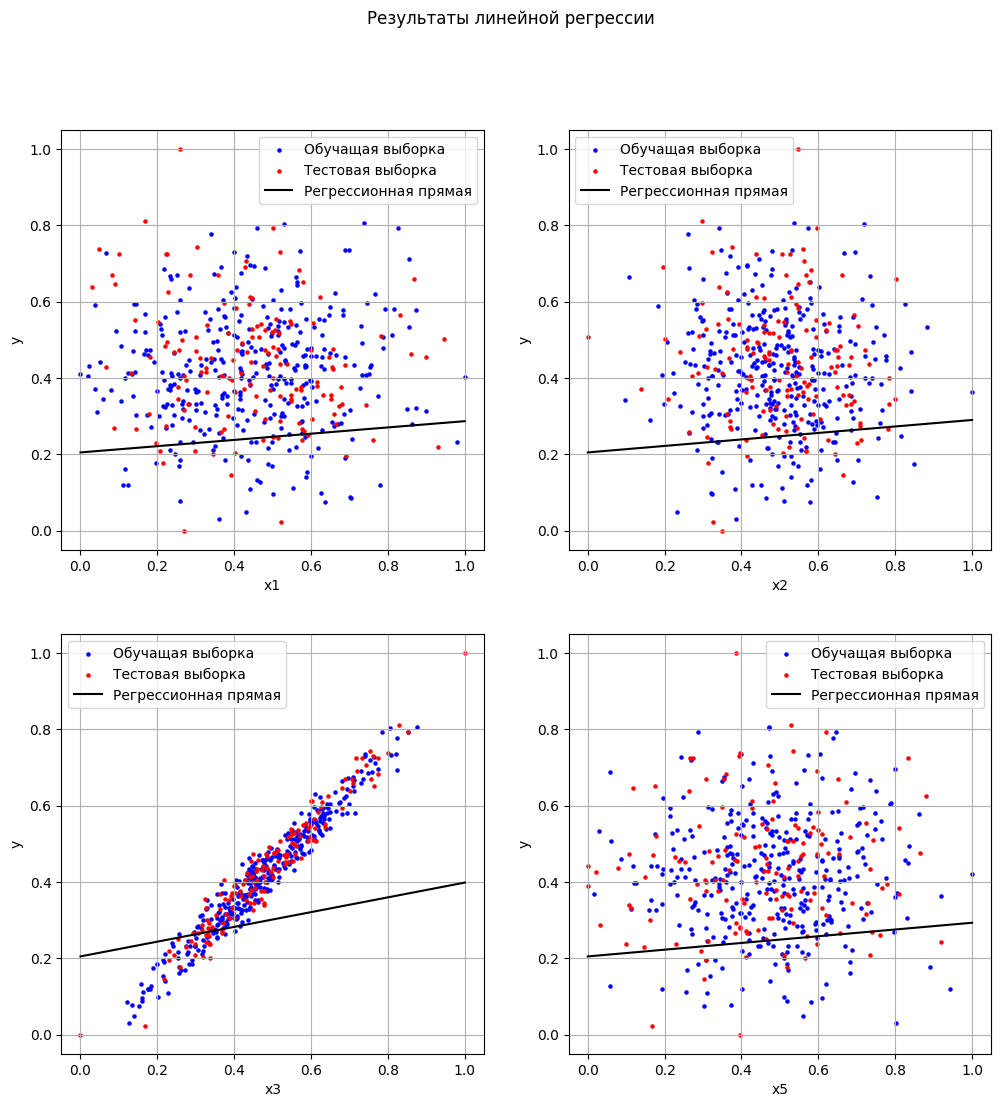

In [ ]:
# Регрессионная прямая
x_line = np.linspace(0, 1, 4)
y_lines = sgd_regr.coef_.reshape(-1, 1) * x_line  + sgd_regr.intercept_



fig, axs = plt.subplots(2, 2, figsize=(12, 12))
predictors = list(X)
for i in range(2):
  for j in range(2):
    ax = axs[i][j]
    predictor = predictors[2 * i + j]
    ax.set_xlabel(predictor)
    ax.set_ylabel('y')
    ax.scatter(X_train[predictor], y_train, c = 'b', s=5, label='Обучащая выборка')
    ax.scatter(X_test[predictor], y_test, c = 'r', s=5, label='Тестовая выборка')
    ax.plot(x_line, y_lines[2 * i + j], c='black', label='Регрессионная прямая')
    ax.grid()
    ax.legend()

fig.suptitle('Результаты линейной регрессии')
fig.show()

### **1.5. Сравнение результатов регрессии**

In [ ]:
regr_res = pd.DataFrame({
    'R2' : [lin_r2_train, lin_r2_test,
            lasso_r2_train, lasso_r2_test,
            ridge_r2_train, ridge_r2_test,
            elastic_r2_train, elastic_r2_test,
            sgd_r2_train, sgd_r2_test
           ],
    'MAE' : [lin_mae_train, lin_mae_test,
             lasso_mae_train, lasso_mae_test,
             ridge_mae_train, ridge_mae_test,
             elastic_mae_train, elastic_mae_test,
             sgd_mae_train, sgd_mae_test
            ],
    'MAPE' : [lin_mape_train, lin_mape_test,
             lasso_mape_train, lasso_mape_test,
             ridge_mape_train, ridge_mape_test,
             elastic_mape_train, elastic_mape_test,
             sgd_mape_train, sgd_mape_test
            ],
    'Метод регрессии' : ['Обычная', 'Обычная',
                'Lasso', 'Lasso',
                'Гребневая', 'Гребневая',
                'ElasticNet', 'ElasticNet',
                'Оптимизируемая градиентным спуском', 'Оптимизируемая градиентным спуском'
                ]
,})
regr_res['Выборка'] = ['Обучающая', 'Тестовая'] * 5


In [ ]:
print(regr_res)

         R2       MAE          MAPE                     Метод регрессии  \
0  0.951958  0.026810  8.254087e-02                             Обычная   
1  0.945652  0.030701  1.578721e+12                             Обычная   
2  0.951923  0.026860  8.312396e-02                               Lasso   
3  0.945608  0.030743  1.504303e+12                               Lasso   
4  0.877646  0.042513  1.593024e-01                           Гребневая   
5  0.860206  0.046463  2.353774e+12                           Гребневая   
6  0.951611  0.027057  8.517071e-02                          ElasticNet   
7  0.944891  0.030919  1.306976e+12                          ElasticNet   
8  0.312448  0.098854  3.805991e-01  Оптимизируемая градиентным спуском   
9  0.262955  0.106987  8.755438e+12  Оптимизируемая градиентным спуском   

     Выборка  
0  Обучающая  
1   Тестовая  
2  Обучающая  
3   Тестовая  
4  Обучающая  
5   Тестовая  
6  Обучающая  
7   Тестовая  
8  Обучающая  
9   Тестовая  


In [ ]:
pd.pivot_table(regr_res, columns=['Метод регрессии', 'Выборка'])

Метод регрессии ElasticNet                   Lasso               Гребневая  \
Выборка          Обучающая      Тестовая Обучающая      Тестовая Обучающая   
MAE               0.027057  3.091939e-02  0.026860  3.074294e-02  0.042513   
MAPE              0.085171  1.306976e+12  0.083124  1.504303e+12  0.159302   
R2                0.951611  9.448907e-01  0.951923  9.456082e-01  0.877646   

Метод регрессии                 Обычная                \
Выборка              Тестовая Обучающая      Тестовая   
MAE              4.646268e-02  0.026810  3.070148e-02   
MAPE             2.353774e+12  0.082541  1.578721e+12   
R2               8.602065e-01  0.951958  9.456521e-01   

Метод регрессии Оптимизируемая градиентным спуском                
Выборка                                  Обучающая      Тестовая  
MAE                                       0.098854  1.069869e-01  
MAPE                                      0.380599  8.755438e+12  
R2                                        0.312448  2.629551e-01

## **2. Нелинейная регрессия**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **2.1. Считывание данных**

In [ ]:
poly2_df = pd.read_csv('lab3_poly2.csv')
poly2_df.head()

,x,y
0,1.2429,0.2452
1,-0.6314,-1.0334
2,0.9256,1.9695
3,0.6894,0.3605
4,-0.1864,-0.1788


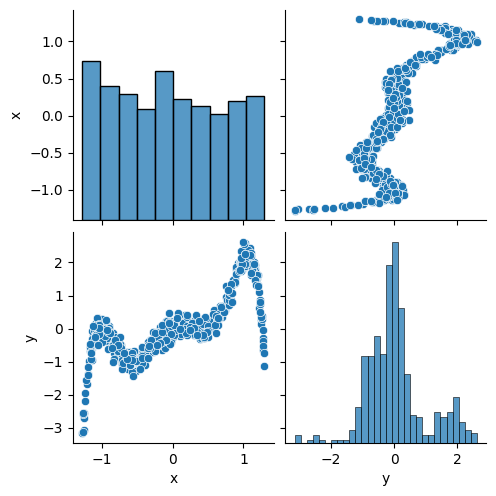

In [ ]:
sns.pairplot(poly2_df)

### **2.2. Предобработка данных**

#### **2.1.1. Нормализация**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_s = MinMaxScaler()
min_max_s.set_output(transform='pandas')
poly2_df_norm = min_max_s.fit_transform(poly2_df)
x = poly2_df_norm[['x']]
y = poly2_df_norm[['y']]

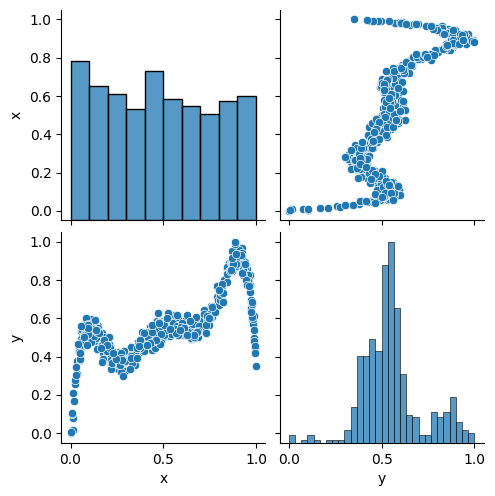

In [ ]:
sns.pairplot(poly2_df_norm)

#### **2.1.2. Разбиение на обучающую и тестовую выборки**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.3)

            x
179  0.328518
411  0.871180
325  0.468144
77   0.169604
332  0.540300
..        ...
241  0.326775
434  0.050234
109  0.841590
105  0.465704
260  0.496417

[350 rows x 1 columns]


<Axes: title={'center': 'Тестовая выборка'}, xlabel='x', ylabel='Proportion'>

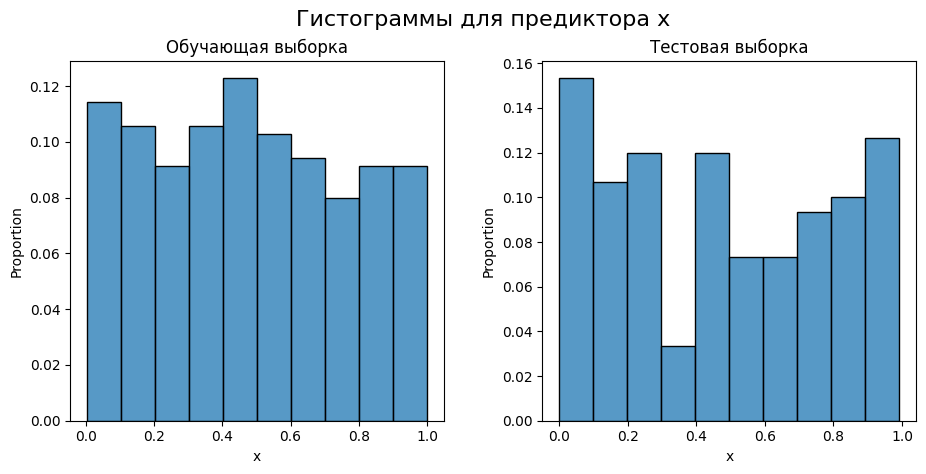

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=4)
axs[0].set_title('Обучающая выборка')
axs[1].set_title('Тестовая выборка')
fig.suptitle('Гистограммы для предиктора x', size=16)
print(x_train)
sns.histplot(x_train, x='x', ax=axs[0], stat='proportion', bins=10)
sns.histplot(x_test, x='x', ax=axs[1], stat='proportion', bins=10)

<Axes: title={'center': 'Тестовая выборка'}, xlabel='y', ylabel='Proportion'>

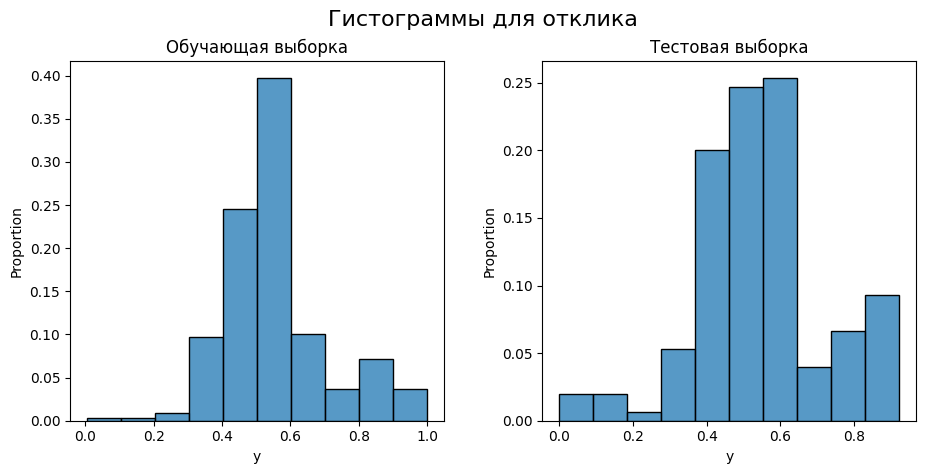

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=4)
axs[0].set_title('Обучающая выборка')
axs[1].set_title('Тестовая выборка')
fig.suptitle('Гистограммы для отклика', size=16)
sns.histplot(y_train, x='y', ax=axs[0], stat='proportion', bins=10)
sns.histplot(y_test, x='y', ax=axs[1], stat='proportion', bins=10)

### **2.3. Линейная регрессия**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(x_train, y_train)
y_train_pred = lin_regr.predict(x_train)
y_test_pred = lin_regr.predict(x_test)

print(lin_regr.coef_)
print(lin_regr.intercept_)


[[0.3821907]]
[0.37198733]


In [ ]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.50926788917804
0.5858382888690862


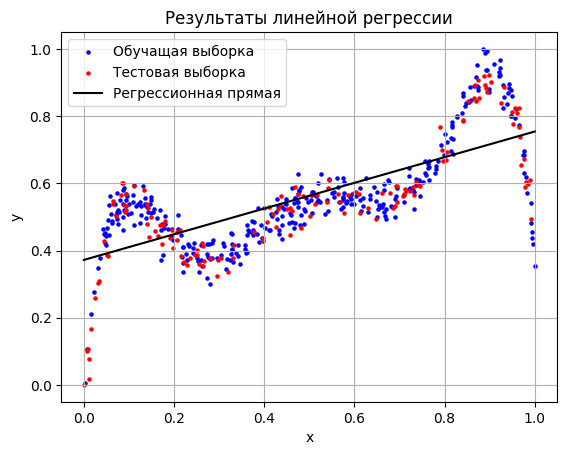

In [ ]:
# Регрессионная прямая
x_line = np.linspace(0, 1, 4)
y_line = lin_regr.coef_[0] * x_line  + lin_regr.intercept_
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_train, y_train, c = 'b', s=5, label='Обучащая выборка')
plt.scatter(x_test, y_test, c = 'r', s=5, label='Тестовая выборка')
plt.plot(x_line, y_line, c='black', label='Регрессионная прямая')
plt.grid()
plt.legend()
plt.title('Результаты линейной регрессии')
plt.show()

### **2.4 Регрессия с использованием полиномиальных признаков**

#### **2.4.1. Подбор степени полинома**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

[[ 7.97454322e-03  1.41737147e+01 -1.28007417e+02  4.89191530e+02
  -9.00231654e+02  7.91602091e+02 -2.66371228e+02]]


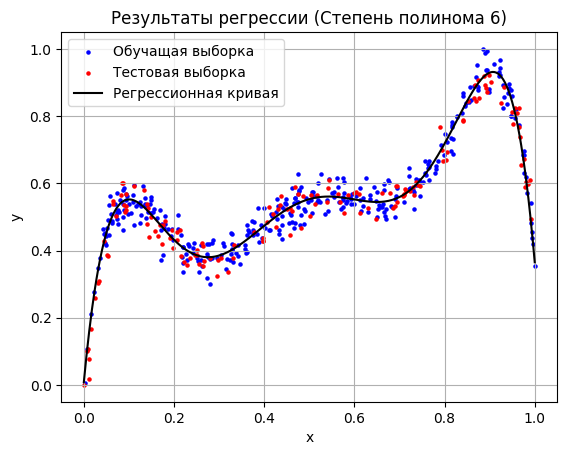

In [ ]:
degree = 6

x_poly = PolynomialFeatures(degree).fit_transform(x_train)
lin_regr = LinearRegression(fit_intercept=False)
lin_regr.fit(x_poly, y_train)

print(lin_regr.coef_)
c = lin_regr.coef_[0]

x_line = np.linspace(0, 1, 500)
y_line = 0
for i in range(degree + 1):
    y_line += c[i] * x_line ** i

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_train, y_train, c = 'b', s=5, label='Обучащая выборка')
plt.scatter(x_test, y_test, c = 'r', s=5, label='Тестовая выборка')
plt.plot(x_line, y_line, c='black', label='Регрессионная кривая')
plt.grid()
plt.legend()
plt.title(f'Результаты регрессии (Степень полинома {degree})')
plt.show()

#### **2.4.2. График зависимости R2 от степени полинома**

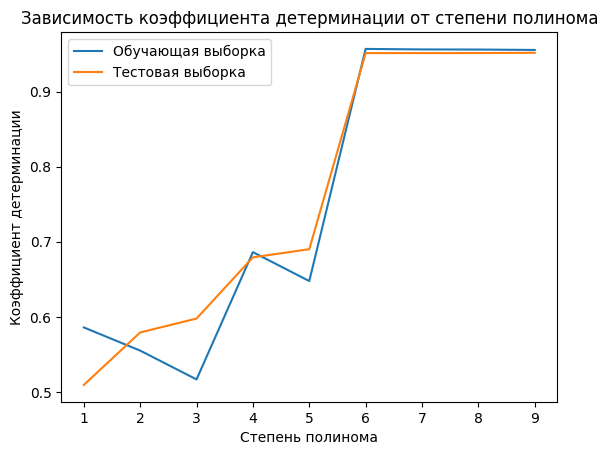

In [ ]:
r2_train = []
r2_test = []

degree_range = range(1, 10)

for degree in degree_range:
    x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(degree).fit_transform(x_test)
    lin_regr = LinearRegression(fit_intercept=False)
    lin_regr.fit(x_poly_train, y_train)
    y_train_pred = lin_regr.predict(x_poly_train)
    y_test_pred = lin_regr.predict(x_poly_test)
    r2_train.append(r2_score(y_train, y_train_pred))
    r2_test.append(r2_score(y_test, y_test_pred))


plt.plot(degree_range, r2_test, label='Обучающая выборка')
plt.plot(degree_range, r2_train, label='Тестовая выборка')
plt.legend()
plt.xlabel('Степень полинома')
plt.ylabel('Коэффициент детерминации')
plt.title('Зависимость коэффициента детерминации от степени полинома')
plt.show()

### **2.5. Расчет метрик**

In [ ]:
x_poly_train = PolynomialFeatures(6).fit_transform(x_train)
x_poly_test = PolynomialFeatures(6).fit_transform(x_test)
lin_regr = LinearRegression(fit_intercept=False)
lin_regr.fit(x_poly_train, y_train)

y_test_pred = lin_regr.predict(x_poly_test)
y_train_pred = lin_regr.predict(x_poly_train)


print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_train, y_train_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))

0.9511701694374486
0.9567580610085727
0.02655887643554616
0.02903586581968863
0.07597576015038723
239427665782.21417


### **2.6. Нелинейная регрессия с помощью TensorFlow**

In [ ]:
import tensorflow as tf
import random

In [ ]:
tf_x_train = tf.constant(x_train, dtype = tf.float32)
tf_y_train = tf.constant(y_train, dtype = tf.float32)
tf_x_test = tf.constant(y_test, dtype=tf.float32)
c = [tf.Variable(random.random())for i in range(7)]
n_iter = 3000
optimizer = tf.keras.optimizers.SGD(0.05)

In [ ]:
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_train_pred = tf.math.polyval(c, tf_x_train)
        loss = tf.reduce_mean(tf.square(tf_y_train - y_train_pred))
    grads = tape.gradient(loss, c)
    optimizer.apply_gradients(zip(grads, c))

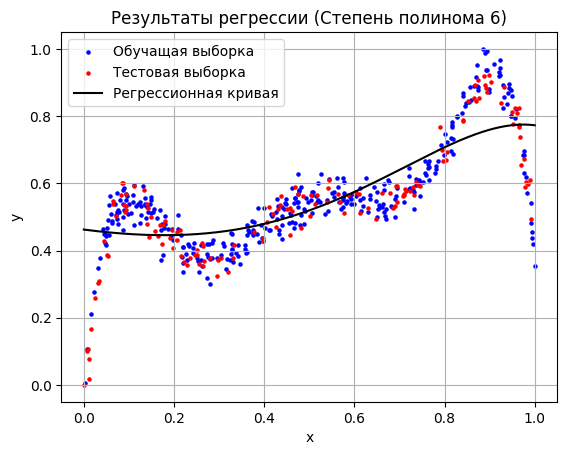

In [ ]:
x_line = np.linspace(0, 1, 10000)
y_line = (c[0].numpy() * x_line ** 6 + c[1].numpy() * x_line ** 5 + c[2].numpy() * x_line ** 4 +
  c[3].numpy() * x_line ** 3  + c[4].numpy() * x_line ** 2 + c[5].numpy() * x_line + c[6].numpy())
y_test_pred = tf.math.polyval(c, tf_x_test)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_train, y_train, c = 'b', s=5, label='Обучащая выборка')
plt.scatter(x_test, y_test, c = 'r', s=5, label='Тестовая выборка')
plt.plot(x_line, y_line, c='black', label='Регрессионная кривая')
plt.grid()
plt.legend()
plt.title(f'Результаты регрессии (Степень полинома {6})')
plt.show()


In [ ]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_train, y_train_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))

0.6194467120088469
0.6696938384873639
0.06935606695156472
0.06501600235013621
0.39769746136046646
13882415200775.176


## **3. Оценка модели регрессии**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **3.1. Считывание данных**

In [ ]:
stud_perf_df = pd.read_csv('Student_Performance.csv')
stud_perf_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
stud_perf_df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
stud_perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


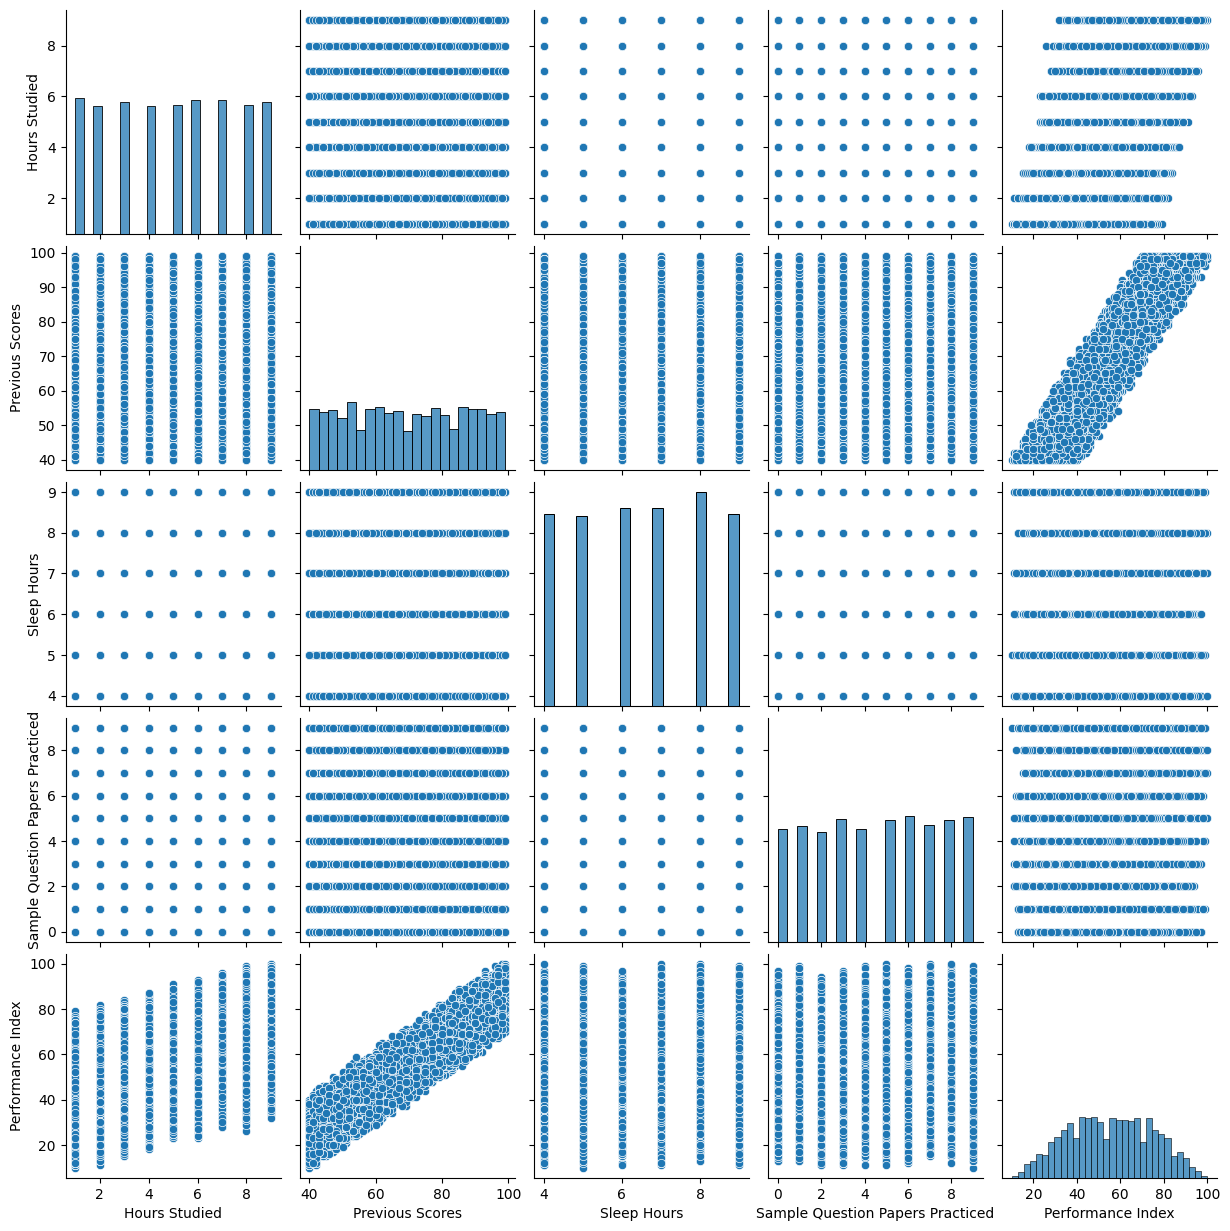

In [ ]:
sns.pairplot(stud_perf_df)

### **3.2. Предобработка данных**

In [ ]:
stud_perf_df.drop_duplicates(inplace=True)
stud_perf_df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
label_enc.fit(('Yes', 'No'))
label_enc.classes_
stud_perf_df['Extracurricular Activities'] = label_enc.transform(stud_perf_df['Extracurricular Activities'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_s = MinMaxScaler()
min_max_s.set_output(transform='pandas')
stud_perf_norm = min_max_s.fit_transform(stud_perf_df)

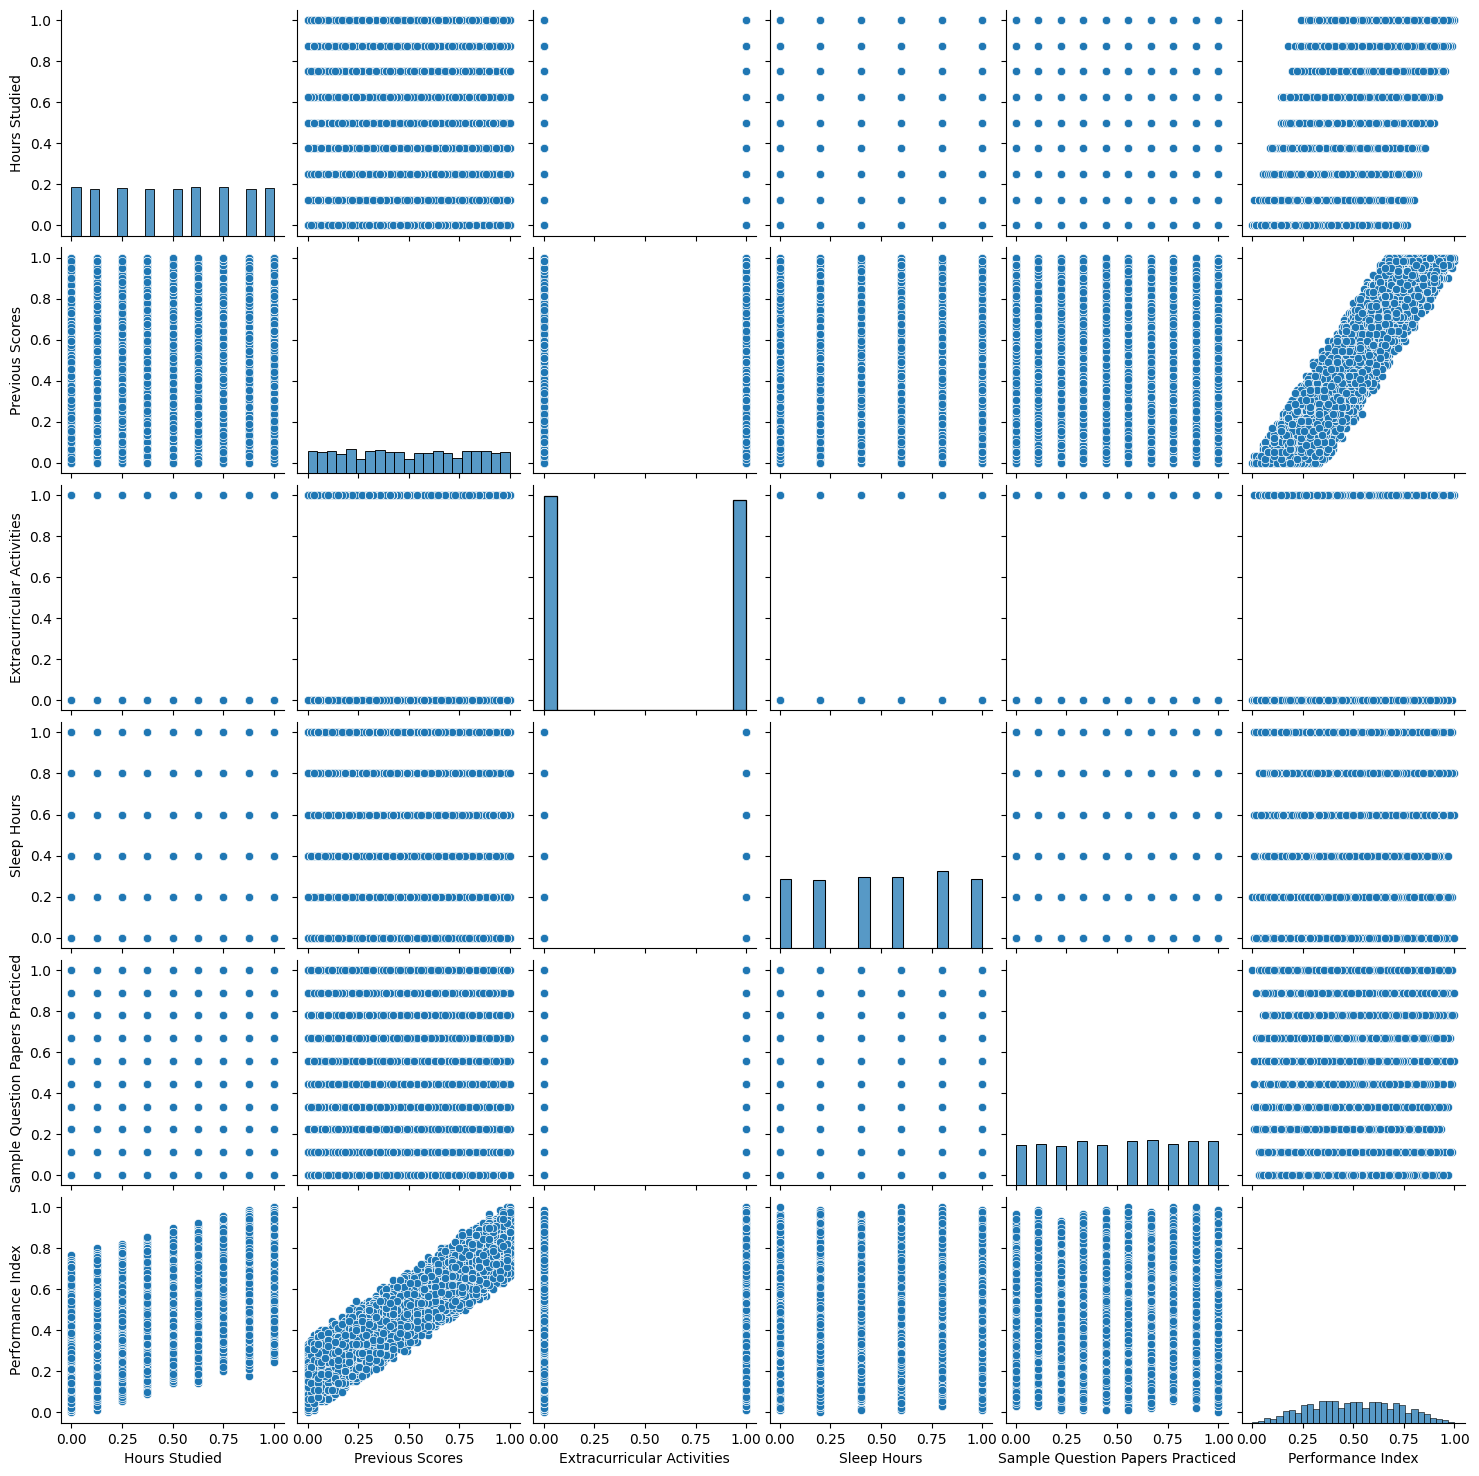

In [ ]:
sns.pairplot(stud_perf_norm)

<Axes: >

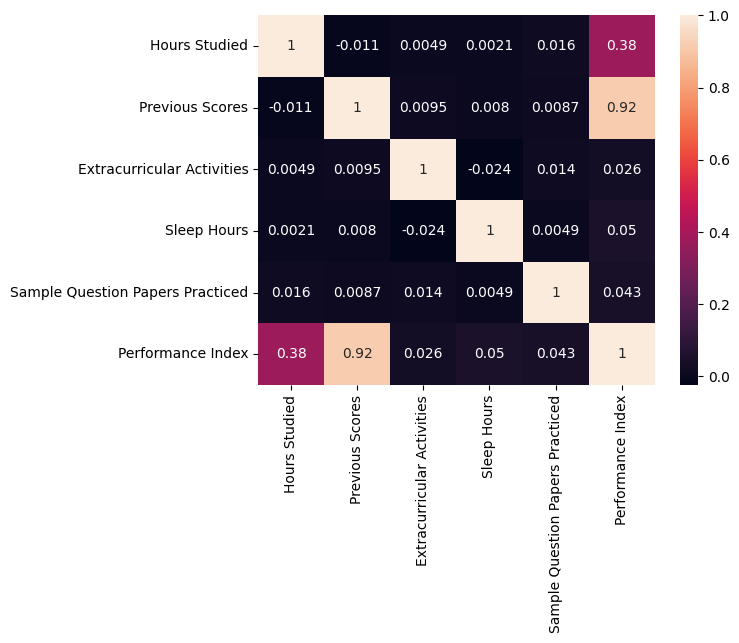

In [ ]:
sns.heatmap(stud_perf_norm.corr(), annot=True)

In [ ]:
X = stud_perf_norm.drop('Performance Index', axis=1)
y = stud_perf_norm[['Performance Index']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### **3.3. Регрессия**

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)
y_train_pred = lin_regr.predict(X_train)
y_test_pred = lin_regr.predict(X_test)
print(lin_regr.coef_, lin_regr.intercept_)
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_train, y_train_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

[[0.2532659  0.6675108  0.00618717 0.02611119 0.01933922]] [0.01657449]
0.01792734409134157
0.0182911082837132
0.051395468353583974
62545523502.93122
0.9888937265788157
0.9881593003934889


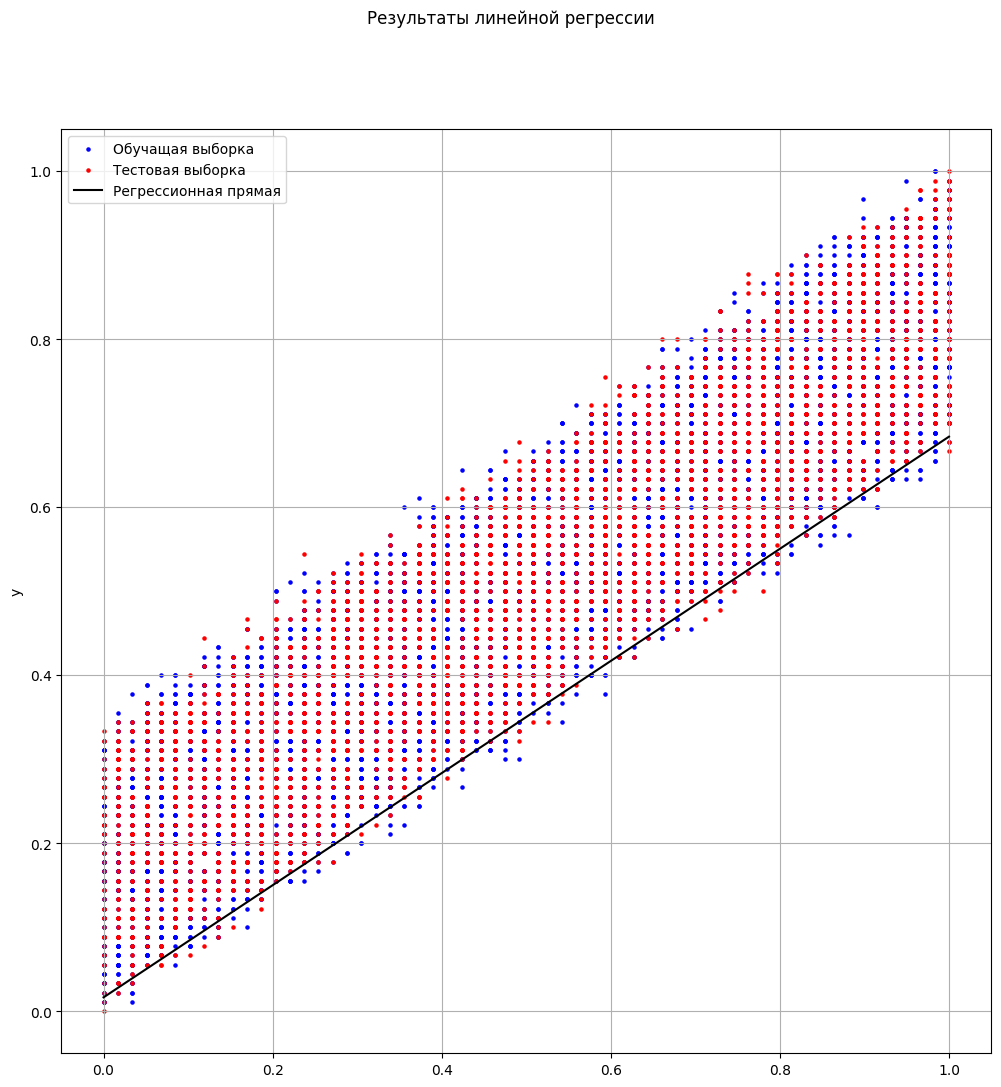

In [ ]:
# Регрессионная прямая
x_line = np.linspace(0, 1, 5)
y_lines = lin_regr.coef_[0][1] * x_line  + lin_regr.intercept_


fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_ylabel('y')
ax.scatter(X_train['Previous Scores'], y_train, c = 'b', s=5, label='Обучащая выборка')
ax.scatter(X_test['Previous Scores'], y_test, c = 'r', s=5, label='Тестовая выборка')
ax.plot(x_line, y_lines, c='black', label='Регрессионная прямая')
ax.grid()
ax.legend()

fig.suptitle('Результаты линейной регрессии')
fig.show()